In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn as skl
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = (9, 5)

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import datetime
from dateutil.relativedelta import relativedelta
from arch import arch_model

p = print

In [24]:
# зафиксируем выборку
np.random.seed(1)

In [26]:
# функция mean absolute persentage error
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

# ARIMA (1, 0, 0)
alpha = 0.5 , p = 1, d = 0, q = 0

процесс сводится к процессу AR, используем arma_generate

In [27]:
AR1 = {} # словарь для хранения данных модели
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [28]:
alphas = np.array([.5]) # p = 1
betas = np.array([0.]) # q = 0
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [29]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ar процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    # генерация процесса для n точек, где n равно i-му шагу
    ar1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ar1,order=(1,0)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении alpha
    cff_prd.append(mdl.params[0])
    
    # mape(np.ones(cnt)*0.5,cff_prd) - считает ошибку для n точек
    cff_mape.append(mape(0.5,mdl.params[0])) 
    print(n,', mape =', cff_mape[cnt-1])
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            #print()
            #print(cff_mape[cnt-1], min_mape, min_n, n)
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
    AR1[n] = ar1 
  
         

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 11.154904797036313
40 , mape = 14.317330182098797
50 , mape = 23.001220545362045
60 , mape = 13.171581380127362
70 , mape = 25.924568671079683
80 , mape = 14.659484763725283
90 , mape = 23.448399327716185
100 , mape = 0.266418865721052
110 , mape = 13.180889594754197
120 , mape = 2.1180856797903713
130 , mape = 6.573730697372415
140 , mape = 5.230099644756803
150 , mape = 17.874060448245398
160 , mape = 0.2881387238724997
170 , mape = 14.293140463661869
180 , mape = 15.167448571944252
190 , mape = 2.4054769071031434
200 , mape = 1.433373079915068
210 , mape = 9.254281410652599
220 , mape = 4.75332686542751
230 , mape = 19.06939169922781
240 , mape = 11.317213288833262
250 , mape = 10.089226305613352
260 , mape = 14.758204988327261
270 , mape = 1.4409487608430194
280 , mape = 3.665451811767495
290 , mape = 19.808082947245342
300 , mape = 1.7118954915641416
310 , mape = 18.105305948505634
320 , mape = 1.9372191225575874
330 , mape = 9.18359355870323
340 , mape = 8.03501473720

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


640 , mape = 6.118788961509813
650 , mape = 13.450106179705635
660 , mape = 4.755208974425806
670 , mape = 6.805513497255511
680 , mape = 4.098033717343252
690 , mape = 9.023297782080508
700 , mape = 5.694098267223624
710 , mape = 4.357544460885854
720 , mape = 0.7576531898759065
730 , mape = 14.608472504698932
740 , mape = 9.104397159209555
750 , mape = 2.6811758554941667
760 , mape = 1.5075958517296595
770 , mape = 0.1284106212165681
780 , mape = 2.892333578872086
790 , mape = 1.8872608719952888
800 , mape = 14.00045007648103
810 , mape = 10.72611608357763
820 , mape = 3.531227378989943
830 , mape = 6.634380952082253
840 , mape = 0.5013460179606577
850 , mape = 2.940538500965162
860 , mape = 4.263125315297733
870 , mape = 6.524136096847277
880 , mape = 4.574631625627601
890 , mape = 12.501829972837708
900 , mape = 6.812626518311449
910 , mape = 3.7658521383460486
920 , mape = 6.153747102317042
930 , mape = 2.720172696373413
940 , mape = 0.9303304227010534
950 , mape = 0.6633092481944

In [30]:
p()            
p('Min n={:1d}, при котором достигается mape alpha менее 5%'.format(min_n) )  


Min n=100, при котором достигается mape alpha менее 5%


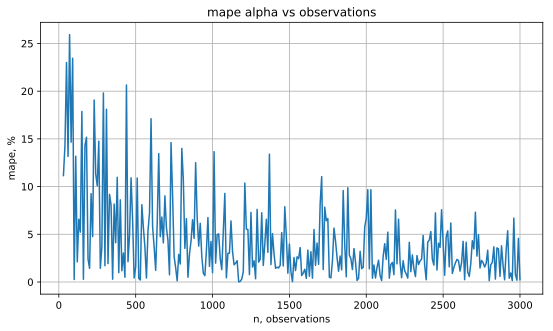

In [31]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha vs observations');

# ARIMA (0, 0, 1)
beta = 0.5 , p = 0, d = 0, q = 1

процесс сводится к процессу MA, используем arma_generate

In [38]:
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [39]:
alphas = np.array([0.]) # p = 0
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [40]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    
    # генерация процесса для n точек, где n равно i-му шагу
    ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ma1,order=(0,1)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении beta
    
    cff_prd.append(mdl.params[0])
     # mape(np.ones(cnt)*0.5,cff_prd) - считает ошибку для n точек
    cff_mape.append(mape(np.ones(cnt)*0.5,mdl.params[0])) 
    
    print(n,', mape =', cff_mape[cnt-1])
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
  


C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 25.6981115360732
40 , mape = 52.027850806298524
50 , mape = 28.10265656915878
60 , mape = 10.460197498679612
70 , mape = 44.30430051222197
80 , mape = 25.85332728703158
90 , mape = 0.6156215926503839
100 , mape = 12.207983366614773
110 , mape = 15.90417667016788
120 , mape = 4.055193983901595
130 , mape = 0.4344200463572645
140 , mape = 32.25120826516321
150 , mape = 13.230094655700025
160 , mape = 6.031233181153528
170 , mape = 2.0374406750711005
180 , mape = 5.7998670505956085
190 , mape = 1.1875039432181822
200 , mape = 11.806567010594529
210 , mape = 9.231870249944949
220 , mape = 8.84638426081752
230 , mape = 0.04730745129292169
240 , mape = 5.798341630674287
250 , mape = 5.982722389319503
260 , mape = 4.7606966695004305
270 , mape = 6.655289841418499
280 , mape = 13.275558484471317
290 , mape = 16.068589032890994
300 , mape = 9.85910832081335
310 , mape = 11.443426832473591
320 , mape = 3.844402952453486
330 , mape = 11.516496572470869
340 , mape = 14.61433376487511
3

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 , mape = 2.684413213154569
610 , mape = 5.530293929505115
620 , mape = 15.115611525694916
630 , mape = 5.49583444916031
640 , mape = 2.7622065041954182
650 , mape = 6.0914657814225865
660 , mape = 6.167075639966058
670 , mape = 2.1337445438808222
680 , mape = 0.20811268757878754
690 , mape = 9.020985120793
700 , mape = 4.506427354037503
710 , mape = 6.17282613128434
720 , mape = 1.35604847777816
730 , mape = 1.1775274657763068
740 , mape = 5.074122769807065
750 , mape = 11.01942554014903
760 , mape = 1.667679842091463
770 , mape = 4.1370393825019836
780 , mape = 9.475579471505991
790 , mape = 1.422751774942066
800 , mape = 0.785657363951231
810 , mape = 0.3032595073619637
820 , mape = 8.379387253601866
830 , mape = 3.8032473954271895
840 , mape = 7.236846505228613
850 , mape = 6.92767040208615
860 , mape = 9.82230974480189
870 , mape = 11.12396023422117
880 , mape = 6.970486168911408
890 , mape = 2.463327460559128
900 , mape = 1.8756084203345624
910 , mape = 6.539461072607922
920 , ma

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1760 , mape = 4.477994997305345
1770 , mape = 4.164767143136894
1780 , mape = 3.2602539370669037
1790 , mape = 3.7913787508163765
1800 , mape = 7.603421330805316
1810 , mape = 2.735409603787908
1820 , mape = 2.7614036494079226
1830 , mape = 0.38700492684093923
1840 , mape = 3.2891204834985643
1850 , mape = 1.7980245978397091
1860 , mape = 3.4812623979080914
1870 , mape = 0.7616626540309035
1880 , mape = 0.09499760075162289
1890 , mape = 7.174484899504985
1900 , mape = 2.4403084718341628
1910 , mape = 5.839843750981655
1920 , mape = 0.45785797709450016
1930 , mape = 1.7289432887232614
1940 , mape = 1.3328134698927352
1950 , mape = 5.560422689471567
1960 , mape = 1.2507436837559174
1970 , mape = 1.6003121140962473
1980 , mape = 0.5573251126517853
1990 , mape = 2.9584381808135163
2000 , mape = 2.8022133292775244
2010 , mape = 6.738262287608452
2020 , mape = 7.029149692123859
2030 , mape = 1.7693684538411913
2040 , mape = 0.9812464970423651
2050 , mape = 0.5147534460684943
2060 , mape = 4.

In [41]:
p()            
p('Min n={:1d}, при котором достигается mape beta менее 5%'.format(min_n) ) 


Min n=90, при котором достигается mape beta менее 5%


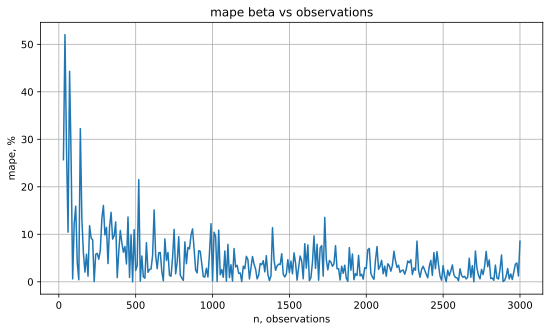

In [42]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape beta vs observations');

# ARIMA (1, 0, 1)

alpha = 0.5, beta = 0.5 , p = 1, d = 0, q = 1

In [64]:
cff_prd_a, cff_prd_b = [], [] # список для хранения коэффициентов n-ой модели
cff_mape_a, cff_mape_b, cff_mape_ab = [], [], [] # писок для хранения mape n-ого шага
min_mape, min_n_a, min_n_b, min_n_ab = 5.0, 0, 0,0 # в описании 0,05, но в задании mean absolute persantage (!)

In [65]:
alphas = np.array([0.5]) # p = 1
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [66]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    arma11 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(arma11,order=(1,1)).fit(maxlag=20, ic='aic', trend='nc')
    
    #считаем ошибку в определении alpha для n точек  
    cff_prd_a.append(mdl.params[0])
    cff_mape_a.append(mape(0.5, mdl.params[0])) 
    
    #считаем ошибку в определении beta для n точек
    cff_prd_b.append(mdl.params[1])
    cff_mape_b.append(mape(0.5, mdl.params[1])) 

    cff_mape_ab.append((cff_mape_a[cnt-1]+cff_mape_b[cnt-1])/2.0)
    print(n,', mape =', cff_mape_ab[cnt-1],'   mean=', np.mean(cff_mape_ab))

    
    if min_n_ab == 0:
        if cff_mape_ab[cnt-1] < min_mape:
            min_n_ab = n
        
    
    cnt+=1 # для увеличения размерности true матрицы alphas и betas

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


30 , mape = 10.260685778880742 10.260685778880742
40 , mape = 56.00982945771578 33.13525761829826
50 , mape = 5.0117435540978805 23.760752930231465
60 , mape = 14.476599916785638 21.43971467687001
70 , mape = 27.81184561837251 22.71414086517051
80 , mape = 10.73167363175724 20.717062992934967
90 , mape = 32.546256391579064 22.406947764169836
100 , mape = 6.389310568313161 20.404743114687754
110 , mape = 0.7868215274456469 18.224974049438632
120 , mape = 14.228091346019795 17.82528577909675
130 , mape = 15.977452976122585 17.65730097882637
140 , mape = 13.06031267969104 17.27421862056509
150 , mape = 3.193793033745407 16.191108960040502
160 , mape = 26.47510552939802 16.925680143566037
170 , mape = 3.2007527192305654 16.010684981943673
180 , mape = 16.51427963850663 16.042159647978856
190 , mape = 16.54517731860647 16.071748922721657
200 , mape = 5.2336265816602445 15.469631014884913
210 , mape = 5.887019158029194 14.965283022418822
220 , mape = 29.919989953879075 15.713018368991834
230

1680 , mape = 2.283702542870547 7.246058175275345
1690 , mape = 1.3865245417126415 7.2109711475294604
1700 , mape = 9.82624585330434 7.226538258873358
1710 , mape = 2.406359469915087 7.198016490891356
1720 , mape = 4.814035135854272 7.183993071155844
1730 , mape = 3.024240735076089 7.159667034102746
1740 , mape = 3.5434912624109582 7.138642756360352
1750 , mape = 4.691553697687495 7.124497732899816
1760 , mape = 7.981485116270032 7.129422947746772
1770 , mape = 3.5673029726049856 7.1090679764602465
1780 , mape = 4.341993056718629 7.093345959870805
1790 , mape = 2.7956059023584223 7.069064942596723
1800 , mape = 2.017956466467985 7.040687928685889
1810 , mape = 9.7133976495088 7.055619267908363
1820 , mape = 1.366629624658594 7.024013769890309
1830 , mape = 2.9971986443908305 7.001766172511859
1840 , mape = 2.9761398081119106 6.979647346333837
1850 , mape = 2.5780986333238443 6.95559516757422
1860 , mape = 4.119729294494046 6.940182853046609
1870 , mape = 6.498345688271506 6.93779454404

In [67]:
p()
#print('Min n {:1d} aplpha, min n {:1d} beta'.format(min_n_a, min_n_b))
p('Min n={:1d}, при котором достигается mape alpha и beta менее 5%'.format(min_n_ab) ) 


Min n=110, при котором достигается mape alpha и beta менее 5%


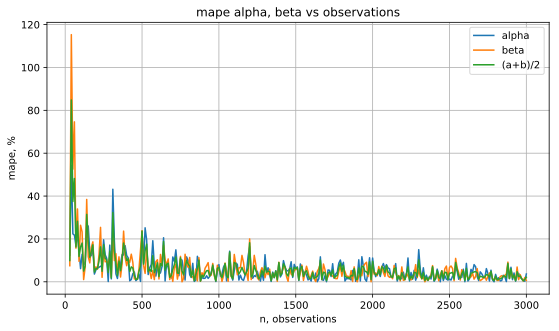

In [63]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape_a, label = 'alpha')
plt.plot(np.array(range(30, 3001, 10)),cff_mape_b, label = 'beta')
plt.plot(np.array(range(30, 3001, 10)),cff_mape_ab, label = '(a+b)/2' )
plt.legend(loc='upper right')
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha, beta vs observations')
plt.show()

Для mape, при которой достигается оценки точности коэффициэнтов, обычно достаточно больше 100 наблюдений

Может быть, потом стоит брать среднее по вектору коэффициентов? Как выводится на печать mean в последнем примере.

Вцелом я до сих пор сомневаюсь, как лучше оценить N
для лучшего качества оценки коэффициентов.